# Lesson 2 - Core Python Libraries for Data Science

1. **Create a Messy Customer Dataset:**

- **Generate Data:** Create a DataFrame using pandas that includes columns such as:
    - `CustomerID` (unique IDs)
    - `Age` (numeric data with a few missing values)
    - `MonthlySpend` (numeric data with some outliers)
    - `ContractType` (categorical text, e.g., "Monthly", "Yearly")
    - `Churn` (binary response: 1 for churn, 0 for no churn)
- **Mess It Up:** Manually insert a few missing values (`NaN`) and inconsistent data entries (e.g., some wrong data types or extra spaces).

2. **Clean and Transform the Data:**
- **Handle Missing Values:** Use techniques like forward fill or filling with the mean.
- **Fix Inconsistencies:** Trim spaces and ensure all text is in a consistent format.

3. **Visualize the Data:**
- **Trend Analysis:** Create plots such as a line plot of `Age `vs. `MonthlySpend` and bar charts of `ContractType`counts.
- **Comparative Visualizations:** Use seaborn to create histograms or boxplots to identify outliers.

4. **Build a Predictive Model:**
- **Prepare the Data:** Split the cleaned dataset into features (e.g., `Age, MonthlySpend, ContractType`) and labels (Churn). Convert categorical data appropriately (e.g., using dummy variables).
- **Train/Test Split:** Use `scikit-learn` to split the data.
- **Model Building:** Build a simple model (like logistic regression) to predict Churn


Columns directly after reading CSV and cleaning: ['customerid', 'age', 'monthlyspend', 'contracttype', 'churn']
df head directly after reading CSV and cleaning:
   customerid   age monthlyspend contracttype churn
0          1  22.0        100.0       Monthy     1
1          2  20.0       1120.0       Monthy     0
2          3  21.0          NaN       Yearly     0
3          4  22.0       1100.0       Monthy     1
4          5   NaN       1500.0       Yearly     1

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    15 non-null     object
 1   age           13 non-null     object
 2   monthlyspend  13 non-null     object
 3   contracttype  13 non-null     object
 4   churn         15 non-null     object
dtypes: object(5)
memory usage: 732.0+ bytes

Original Data Head:
  customerid   age monthlyspend contracttype chur

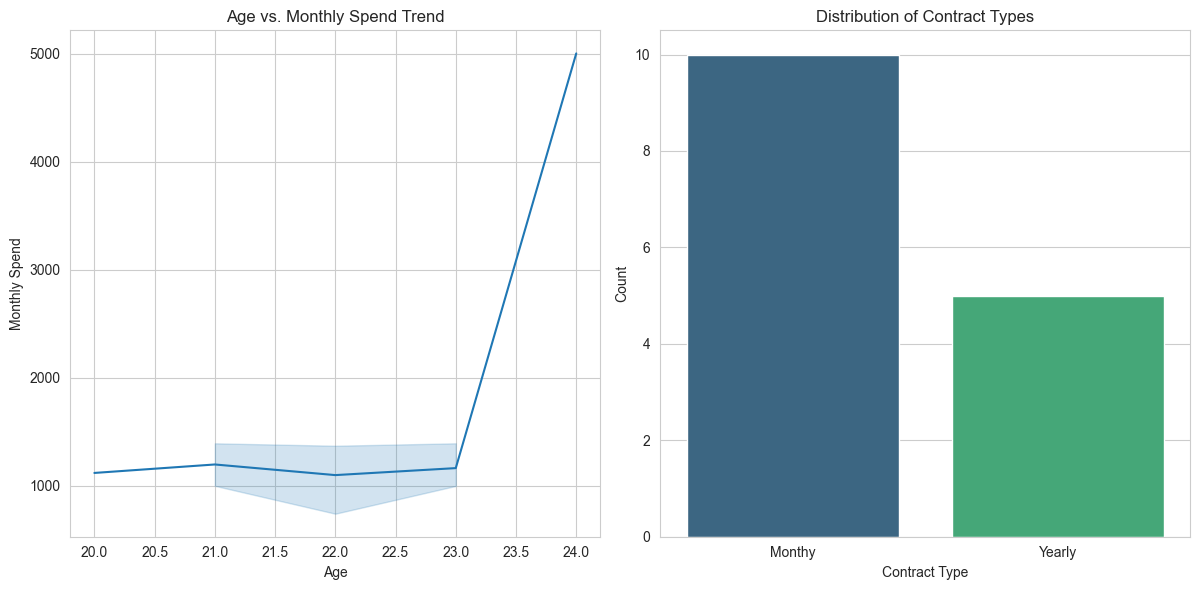

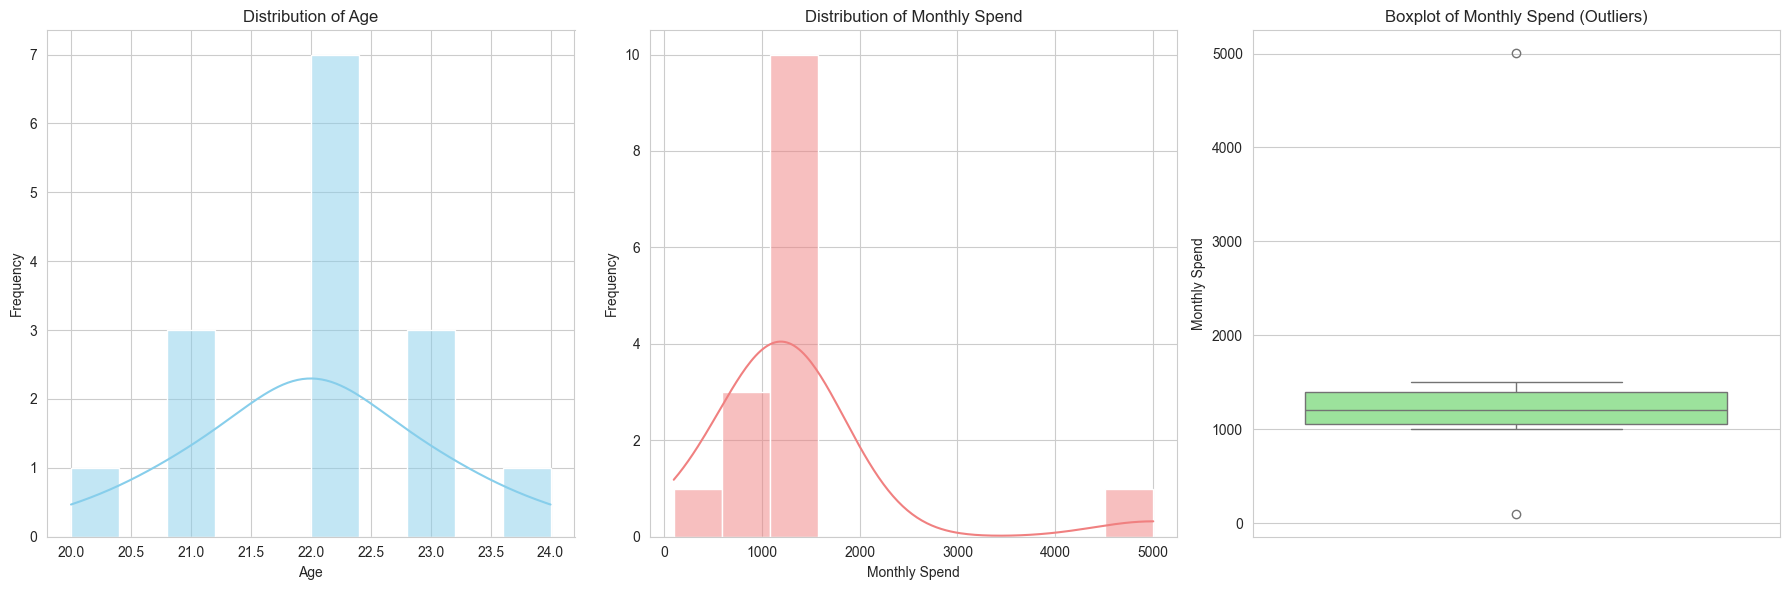


--- Predictive Model Building ---
Columns before preparing data for model: ['customerid', 'age', 'monthlyspend', 'contracttype', 'churn']
Columns after dropping customerid: ['age', 'monthlyspend', 'contracttype', 'churn']
Columns after get_dummies: ['age', 'monthlyspend', 'churn', 'contracttype_Yearly']

Features (X) Head:
    age  monthlyspend  contracttype_Yearly
0  22.0         100.0                False
1  20.0        1120.0                False
2  21.0        1394.0                 True
3  22.0        1100.0                False
4  22.0        1500.0                 True

Labels (y) Head:
0    1
1    0
2    0
3    1
4    1
Name: churn, dtype: int32

Training set size: 10 samples
Test set size: 5 samples
Churn distribution in training set:
churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Churn distribution in test set:
churn
1    0.6
0    0.4
Name: proportion, dtype: float64

Unique values and types in y_train:
churn
0    5
1    5
Name: count, dtype: int64
int32

Unique va

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

class CustomerChurnAnalyzer:
    """Customer churn analysis with data cleaning, visualization, and modeling."""

    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
        self.model = None
        self.X_train = self.X_test = self.y_train = self.y_test = None

    def load_and_clean_data(self):
        """Load and clean the dataset."""
        # Load data
        try:
            self.df = pd.read_csv(self.filepath)
        except FileNotFoundError:
            print(f"Error: {self.filepath} not found. Please ensure the file is in the correct directory.")
            return False

        # Clean column names and recreate DataFrame
        self.df.columns = [col.strip().lower() for col in self.df.columns]
        df_cleaned = pd.DataFrame(self.df.values, columns=self.df.columns)
        self.df = df_cleaned

        print("Columns directly after reading CSV and cleaning:", self.df.columns.tolist())
        print("df head directly after reading CSV and cleaning:\n", self.df.head())
        print("\nOriginal Data Info:")
        self.df.info()
        print("\nOriginal Data Head:")
        print(self.df.head())

        # Data cleaning and transformation
        print("\n--- Starting Data Cleaning and Transformation ---")
        print("Columns before handling missing values:", self.df.columns.tolist())

        # Handle missing values
        self.df['age'] = self.df['age'].fillna(self.df['age'].mean())
        self.df['monthlyspend'] = self.df['monthlyspend'].fillna(self.df['monthlyspend'].mean())
        self.df['contracttype'] = self.df['contracttype'].fillna(self.df['contracttype'].mode()[0])
        print("Columns after handling missing values:", self.df.columns.tolist())

        # Convert churn to numeric
        self.df['churn'] = pd.to_numeric(self.df['churn'], errors='coerce')
        self.df.dropna(subset=['churn'], inplace=True)
        self.df['churn'] = self.df['churn'].astype(int)

        # Fix inconsistencies
        print("Columns before fixing inconsistencies:", self.df.columns.tolist())
        self.df['contracttype'] = self.df['contracttype'].str.strip().str.capitalize()
        print("Columns after fixing inconsistencies:", self.df.columns.tolist())

        # Summary
        print("\n--- Data Cleaning and Transformation Summary ---")
        print("Data Info after filling missing values and converting churn to numeric:")
        self.df.info()
        print("\nData Head after cleaning:")
        print(self.df.head())
        print("\nUnique contracttype values after cleaning:")
        print(self.df['contracttype'].unique())
        print("\nUnique churn values after cleaning:", self.df['churn'].unique())

        return True

    def visualize_data(self):
        """Create all visualizations."""
        if self.df is None:
            return

        sns.set_style("whitegrid")

        # First set of plots
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        sns.lineplot(x='age', y='monthlyspend', data=self.df)
        plt.title('Age vs. Monthly Spend Trend')
        plt.xlabel('Age')
        plt.ylabel('Monthly Spend')

        plt.subplot(1, 3, 2)
        sns.countplot(x='contracttype', data=self.df, palette='viridis')
        plt.title('Distribution of Contract Types')
        plt.xlabel('Contract Type')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

        # Second set of plots
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        sns.histplot(self.df['age'], kde=True, bins=10, color='skyblue')
        plt.title('Distribution of Age')
        plt.xlabel('Age')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 2)
        sns.histplot(self.df['monthlyspend'], kde=True, bins=10, color='lightcoral')
        plt.title('Distribution of Monthly Spend')
        plt.xlabel('Monthly Spend')
        plt.ylabel('Frequency')

        plt.subplot(1, 3, 3)
        sns.boxplot(y=self.df['monthlyspend'], color='lightgreen')
        plt.title('Boxplot of Monthly Spend (Outliers)')
        plt.ylabel('Monthly Spend')

        plt.tight_layout()
        plt.show()

    def build_and_evaluate_model(self):
        """Prepare data, build model, and evaluate."""
        print("\n--- Predictive Model Building ---")
        print("Columns before preparing data for model:", self.df.columns.tolist())

        # Prepare data
        df_model = self.df.drop('customerid', axis=1)
        print("Columns after dropping customerid:", df_model.columns.tolist())

        df_model = pd.get_dummies(df_model, columns=['contracttype'], drop_first=True)
        print("Columns after get_dummies:", df_model.columns.tolist())

        # Separate features and target
        X = df_model.drop('churn', axis=1)
        y = df_model['churn']

        print("\nFeatures (X) Head:")
        print(X.head())
        print("\nLabels (y) Head:")
        print(y.head())

        # Train/Test Split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        print(f"\nTraining set size: {len(self.X_train)} samples")
        print(f"Test set size: {len(self.X_test)} samples")
        print(f"Churn distribution in training set:\n{self.y_train.value_counts(normalize=True)}")
        print(f"Churn distribution in test set:\n{self.y_test.value_counts(normalize=True)}")

        print("\nUnique values and types in y_train:")
        print(self.y_train.value_counts())
        print(self.y_train.dtype)

        print("\nUnique values and types in y_test:")
        print(self.y_test.value_counts())
        print(self.y_test.dtype)

        # Build and train model
        self.model = LogisticRegression(random_state=42, solver='liblinear')
        self.model.fit(self.X_train, self.y_train.values.astype(np.int64))

        # Evaluate model
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        report = classification_report(self.y_test, y_pred)

        print(f"\nModel Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(report)

        # Feature importance
        print("\nModel Coefficients:")
        coefficients = pd.DataFrame({
            'Feature': self.X_train.columns,
            'Coefficient': self.model.coef_[0]
        })
        print(coefficients.sort_values(by='Coefficient', ascending=False))

    def run_analysis(self):
        """Run complete analysis pipeline."""
        if self.load_and_clean_data():
            self.visualize_data()
            self.build_and_evaluate_model()

# Initialize and run the analysis
analyzer = CustomerChurnAnalyzer('file final - Juliana R. Mancera 3BSCS-2.csv')
analyzer.run_analysis()